# 클래스 변수와 인스턴스 변수

In [ ]:
class Car:
    # 클래스 변수의 위치
    max_speed = 300
    max_people = 5
    car_gear = ['P', 'D', 'R', 'N']

modelx = Car()
modely = Car()

modely.max_speed = 500 # 인스턴스 변수를 변환한거

print(Car.max_speed) # 출력 300
print(modelx.max_speed) # 출력 300
print(modely.max_speed) # 출력 500 (인스턴스 변환된걸 출력)

300
300
500


In [ ]:
class Car:
    # 클래스 변수의 위치
    max_speed = 300
    max_people = 5
    car_gear = ['P', 'D', 'R', 'N']

modelx = Car()
modely = Car()

modely.max_speed = 500 # 인스턴스 변수를 변환한거

print(id(Car.max_speed)) # 출력 300
print(id(modelx.max_speed)) # 출력 300
print(id(modely.max_speed)) # 출력 500 (인스턴스 변환된걸 출력) id가 혼자만 다르다 위의 두개는 똑같고

133218459437744
133218459437744
133218459437872


In [ ]:
# 일부러 혼란을 주기 위한 문제
# 이런 문제는 실무에서 거의 발생안함
class Car:
    kinds = []
    speed = 300

    def add_kinds(self, name):
        #self.kinds() 이것을 넣었으면 위의 kinds를 먼저 참조
        self.kinds.append(name)

    def change_speed(self, speed):
        self.speed = speed

modelx = Car()
modely = Car()

modelx.add_kinds('x')
modely.add_kinds('y')

Car.speed = 100

# modelx.change_speed(500)
# modely.change_speed(250)

print(f'modelx.kinds: {modelx.kinds}')
print(f'modely.kinds: {modely.kinds}')
print(f'modelx.speed: {modelx.speed}')
print(f'modely.speed: {modely.speed}')

modelx.kinds: ['x', 'y']
modely.kinds: ['x', 'y']
modelx.speed: 100
modely.speed: 100


In [ ]:
class Car:
    kinds = []
    speed = 300

    def add_kinds(self, name):
        #self.kinds() 이것을 넣었으면 위의 kinds를 먼저 참조
        self.kinds.append(name)

    def change_speed(self, speed):
        self.speed = speed

modelx = Car()
modely = Car()

modelx.add_kinds('x')
modely.add_kinds('y')

# Car.speed = 100

modelx.change_speed(500)
modely.change_speed(250)

print(f'modelx.kinds: {modelx.speed}')
print(f'modely.kinds: {modely.speed}')

modelx.kinds: 500
modely.kinds: 250


In [ ]:
kinds = [] # 전역변수 speed 300 안에 값이 있었다면 먼저 출력후 인스턴스 추가된 값이 다음으로 출력된다 [kinds, add_kinds]식으로

def add_kinds(value):
    kinds.append(value) # 지역에 해당 변수가 없으므로 전역변수 kinds에 append

add_kinds(100)
kinds

[100]

In [ ]:
kinds = [] # 전역변수 speed 300

def add_kinds(value):
    kinds = [] # 이 식을 넣으면 밑의 인스턴스 값이 출력이 안된다.
    kinds.append(value) # 지역에 해당 변수가 없으므로 전역변수 kinds에 append

add_kinds(100)
kinds

[]

In [ ]:
x = 100
def test():
    print(x) # 내 메모리 영역에 x가 없네? 그러면 찾아 올라간다

test()

100


In [ ]:
x = 100
def test():
    x = 200 # 값은 읽어 들여도 출력은 변경 안된다.
    # x는 전역변수는 건드리지 않고 지역변수 200을 선언한것뿐이다.

test()
x

100

In [ ]:
x = 100
def test():
    global x # global로 전역변수를 변경하는게 가능하다.
    x = 200

test()
x

200

In [ ]:
x = 100
def test():
    x += 100 # x = x + 100에서 x + 100 부분에서 에러 (전역변수의 변경을 막을려고 에러가 나온것.)

test()

UnboundLocalError: ignored

In [ ]:
x = 100
def test():
    global x
    x += 100

test()
x

200

In [ ]:
# 매우 중요
x = []
def test():
    x.append(100) #

test()
x

[100]

In [ ]:
# 매우 중요
l = [10, 20, 30]
def test(ll):
    ll.append(40) # ll은 [10, 20, 30]을 가리킨다. (l을 가리키는게 아니라)

test(l)
l

[10, 20, 30, 40]

In [ ]:
# 매우 중요
i = 100
def test(ii):
    ii=  300

test(i)
i

100

In [ ]:
# 매우 중요
i = [10, 20, 30]
def test(ii):
    ii=  100

test(i)
i

[10, 20, 30]

In [ ]:
def hello():
    print('hello world')

print(type(hello)) # 출력: <class 'function'>
#isinstance(hello, def)

<class 'function'>


# 매직 메서드 magic method

In [ ]:
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        if isinstance(other, Point):
            return Point((self.x + other.x), (self.y + other.y))
        elif isinstance(other, int) or isinstance(other, float):
            return Point((self.x + other), (self.y + other))

    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return (dx**2 + dy**2)**0.5

dot1 = Point(10, 20)
dot2 = Point(20, 30)

dot3 = dot1 + 10
print(dot1.x, dot1.y) # 출력: 10 20
print(dot3.x, dot3.y) # 출력: 20 30

dot4 = dot1 + dot2
print(dot4.x, dot4.y) # 출력: 30 50
print(dot4.distance(dot1)) # 출력: 36.05551275463989

10 20
20 30
30 50
36.05551275463989


In [ ]:
# 개행 규칙 철저하게 지켜야 한다 그래야 실행된다.
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __mul__(self, other):
        return 'hello'

dot1 = Point(10, 20)
dot2 = Point(20, 30)

dot1 * dot2 # 출력: hello

In [ ]:
class Counter:

    def __init__(self):
        self.num = 0

    def __len__(self):
        return 100000

    def __call__(self):
        return 'hello'

    def __getitem__(self, key):
        return key*10

    def __str__(self):
        return 'hello'

    def __repr__(self):
        return 'wolrd'

c = Counter()
len(c)
c()
c[10]
print(c) # print(str(c)) __str__ 출력
c # __repr__ 출력

hello


# 상속

In [ ]:
class A:
    def hello(self):
        return 'hello'

class B(A):
    def world(self):
        return 'world'

b = B()
b.hello() # 'hello' 출력 A class에서 'hello'를 받아오는거 오버라이딩 해온것이다.
b.world() # 'world' 출력

'world'

In [ ]:
class A:
    def hello(self):
        return 'hello'

class B(A):
    def __init__(self, a, b):
        print(a, b)

    def world(self):
        return 'world'

b = B(10) # A에서 처리하는 것이 아니고 a에서 처리하는거임
b.hello()
b.world()

TypeError: ignored

In [ ]:
# 파이썬 2.x 일때는 object를 반드시 넣어야 했지만, 3.x는 안넣어도 된다.
class A(object):
    def hello(self):
        return 'hello'

class B(A):
    def __init__(self, a):
        print(a)

    def world(self):
        return 'world'

b = B(10) # A에서 처리하는 것이 아니고 a에서 처리하는거임
b.hello()
b.world()
dir(b)

10


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'hello',
 'world']

In [ ]:
# 모든 클래스는 부모클래스에 변화된 변수값에 따라간다.

class A(object):
    test = 0
    def one(self):
        return 'one'

class B(A):
    def two(self):
        return 'two'

class C(B):
    def three(self):
        return 'three'



c = C()
A.test = 300
c.test # 상속을 받을 때 내 보유하고 있는 값은 아니다. 참조 값이다.

300

In [ ]:
class Car(object):
    maxSpeed = 300
    maxPeople = 5

    def move(self):
        print('출발하였습니다.')

    def stop(self):
        print('멈췄습니다.')

class HybridCar(Car):
    battery = 1000
    batteryKM = 300

class ElectricCar(HybridCar):
    battery = 2000
    batteryKM = 600


modelx = HybridCar()
electricCarModely = ElectricCar()
print(modelx.maxSpeed)
print(electricCarModely.maxSpeed)
print(electricCarModely.battery)
electricCarModely.move()

300
300
2000
출발하였습니다.


## 다중 상속

In [ ]:
class A:
    def hello(self):
        print('hello A')

class B:
    def hello(self):
        print('hello B')

class C(A, B):
    pass

c = C()
c.hello() # 주의! python의 코드의 특성상 hello B라고 오해할만합니다. 2.x와 3.x가 상속에 순서가 다릅니다.

hello A


In [ ]:
# 주의 2.x와 3.x가 아래 다이아몬든 상속에 순서가 다르다.

class A:
    def hello(self):
        print('hello A')

class B(A):
    def hello(self):
        print('hello B')

class C(A):
    def hello(self):
        print('hello C')

class D(B, C):
    pass

d = D()
d.hello()
D.mro()

hello B


[__main__.D, __main__.B, __main__.C, __main__.A, object]

In [ ]:
# 다중 상속을 했을 때 상속에서 에러가 나는 경우 (상속이 꼬이는 경우) - 정상 실행되는 거
# 2.x버전은 class A를 class A(object)로 변경해야한다.

class A:
    def hello(self):
        print('hello A')

class B(A):
    def hello(self):
        print('hello B')

class C(B):
    def hello(self):
        print('hello C')

class D(C, B):
    pass

d = D()
d.hello()
D.mro

hello C


<function D.mro()>

In [ ]:
# 다중 상속을 했을 때 상속에서 에러가 나는 경우 (상속이 꼬이는 경우) - 에러가 나는 거
class A:
    def hello(self):
        print('hello A')

class B(A):
    def hello(self):
        print('hello B')

class C(B):
    def hello(self):
        print('hello C')

class D(B, C):
    pass

d = D()
d.hello()
D.mro

TypeError: ignored

# 연습문제

##  문제
* 게임에서 캐릭터를 구현 할 예정 아래 클래스를 적절하게 조합하여 hero 인스턴스와 villain 인스턴스를 만들어라.
---
* 1. class Body (능력치)
* 2. class Weapon (무기)
* 3. class Weapon Enhancement (무기강화)
* 4. class Skill (기술)
* 5. class Equipment (장비)
* 6. class Role (히어로인지, 빌런인지, 몹인지)

In [ ]:
# 문제 풀이

class Weapon:
    def setDamage(self, damage):
        self.damage = damage

class Weapon_Enhancement(Weapon):
    def setEnhancement(self, success):
        if success == True:
            self.damage *= 5
        else:
            self.damage = 0

class Equipment(Weapon_Enhancement):
    def setEquipment(self, equipment):
        self.equipment = equipment

class Role:
    def setRole(self, role):
        self.role = role

class Skill:
    def jarvis(self):
        return '자비스! 도와줘!'

    def beam(self):
        return '나가라 빔!'

class Body(Role,  Skill, Equipment):
    def __init__(self, role, hp, mp, power):
        self.setRole(role)

ironman = Body('hero', 100, 100, 100)
thanos = Body('villain', 100, 100, 80)
b.setEquipment('Sword')
ironman.role
ironman.jarvis()
ironman.beam()
ironman.setDamage(1000)
ironman.damage
ironman.setEnhancement(True)
ironman.setEnhancement(True)
ironman.damage
print(b.equipment)

25000

In [ ]:
# class Body:
#     def __init__(self, hp, mp, level):
#         self.hp = hp
#         self.mp = mp
#         self.level = level

# class Weapon:
#     def __init__(self, sword, staff):
#         self.sword = sword
#         self.staff = staff

# class WeaponEnhancement(Weapon):
#     def __init__(self, sword ,staff ,enhancement_level=0):
#         super().__init__(sword ,staff)
#         self.enhancement_level= enhancement_level

# class Skill:
#     def __init__(self, attack, magic, sneak):
#         self.attack = attack
#         self.magic = magic
#         self.sneak = sneak

# class Equipment:
#      def __init__(self, shield, clothes, shose):
#         self.shield = shield
#         self.clothes = clothes
#         self.shose = shose

# class Role:
#     def __init__(self, hero, villain, monster):
#         self.hero = hero
#         self.villain = villain
#         self.monster = monster


## 과제

* 문제 1:
동물 클래스 Animal을 만들고 어주세요. Dog와 Cat 클래스를 각각 정의하십시오.
---
Animal 클래스는 name 속성을 가집니다. 이 클래스는 make_sound 메서드를 갖고 있습니다.

Dog와 Cat 클래스는 Animal 클래스를 상속받는 클래스입니다.Dog 클래스의 make_sound 메서드는 "멍멍!"을, Cat 클래스의 make_sound 메서드는 "야옹!"을 출력하도록 재정의하세요.

더 완성도 높은 클래스를 만들어보세요. 추가 속성이나 메서드 작성 가능합니다.

In [ ]:
# 문제 1

class Animal:
    #name

    pass

class Dog(Animal):
    # make_sound
    # "멍멍!"
    pass

class Cat(Animal):
    #  make_sound
    # "야옹!"
    pass

In [ ]:
# 문제 1
class Animal:
    def __init__(self, name):
        self.name = name

    def make_sound(self):
        pass
        #self = self 는 pass처럼 작용된다.

class Dog(Animal):
    def make_sound(self):
        return '멍멍!'

class Cat(Animal):
    def make_sound(self):
        return '야옹!'

dog = Dog('바둑이')
cat = Cat('야옹이')

# 출력

print(dog.name)
print(cat.name)
print(dog.make_sound())
print(cat.make_sound())

바둑이
야옹이
멍멍!
야옹!


In [ ]:
# 문제 풀이
class Animal:
    def __init__(self, name):
        self.name = name

    def make_sound(self):
        pass


class Dog(Animal):
    def make_sound(self):
        return "멍멍!"


class Cat(Animal):
    def make_sound(self):
        return "야옹!"

* 문제 2:
Person이라는 기본 클래스를 만들어주세요. Person 클래스는 이름과 나이라는 두 개의 속성과 소개하기라는 메서드를 가지며, 이 메서드는 "Hello World!, 제 이름은 [이름]이고 제 나이는 [나이]살 입니다."라는 메시지를 출력합니다.
---
Person 클래스를 상속받는 Student 클래스를 정의하십시오. Student 클래스는 추가적으로 학년 속성을 가집니다. Student 클래스에서 소개하기 메서드를 오버라이드하여 "Hello World!, 제 이름은 [이름]이고 제 나이는 [나이]살 입니다. 그리고 저는 [학년]학년입니다. "라는 메시지를 출력하도록 만드세요.

In [ ]:
# 문제 2

class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def introduce(self):
        return f'제 이름은 {self.name}이고, 제 나이는 {self.age}살 입니다.'


class Student(Person):
    def __init__(self, name, age, grade):
        super().__init__(name, age)
        self.grade = grade

    def introduce(self):
        return super().introduce() + f'그리고 저는 {self.grade}학년입니다.'


A = Student('이동찬', '14', '5')

#출력
print(A.introduce())

제 이름은 이동찬이고, 제 나이는 14살 입니다.그리고 저는 5학년입니다.


In [ ]:
# 문제 풀이
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def introduce(self):
        return f'안녕하세요! 제 이름은 {self.name}이고 제 나이는 {self.age}입니다'


class Student(Person):
    def __init__(self, name, age, grade):
        super().__init__(name, age)
        self.grade = grade

    def introduce(self):
        return f'안녕하세요! 제 이름은 {self.name}이고 제 나이는 {self.age}입니다. {self.grade}학년 입니다.'


s = Student('jun', 10, 3)
s.introduce()

In [ ]:
# 참조
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def introduce(self):
        return f'제 이름은 {self.name}이고, 제 나이는 {self.age}살 입니다.'

class Student(Person):
    def __init__(self, name, age, grade):  # 수정된 부분: name과 age를 받아야 함
        super().__init__(name, age)   # 부모 클래스인 Animal의 __init__ 메소드 호출
        self.grade = grade

    def introduce(self):  # 부모 클래스인 Animal의 introduce 메소드를 오버라이딩
        return super().introduce() + f' 그리고 저는 {self.grade}학년입니다.' # 부모 클래스인 Animal의 introduce 메소드 호출


A = Student('동찬이', '14', '2')  # Student 객체 생성

print(A.introduce())  # introduce 메서드 출력

# super()는 주로 상속관계의 부모나 슈퍼클래스의 메서드나 속성을 호출하여 가져올수 있는 명령어이다.

제 이름은 동찬이이고, 제 나이는 14살 입니다. 그리고 저는 2학년입니다.


# 클래스 메서드와 정적 메서드

## 클래스 메서드

In [ ]:
# 클레스 메서드
class MyClass:
    count = 0

    @classmethod
    def increment(cls): # 관습 cls, self라는 명을 임의로 변경하지말고 저대로 쓰자
        cls.count += 1

a = MyClass()
b = MyClass()

MyClass.increment()
print(MyClass.count)  # 출력: 1

a.count, b.count

MyClass.increment()

print(a.count, b.count)

1
2 2


In [ ]:
# 일반 클래스로 고쳐 쓴 코드
class MyClass:
    count = 0

    def increment(self): # 관습 cls, self라는 명을 임의로 변경하지말고 저대로 쓰자
        self.count += 1

# MyClass.increment() # error
a.increment()

print(a.count, b.count)

a.increment()

print(a.count, b.count)

3 3
4 4


## 정적 메서드

In [ ]:
class MyClass:
    @staticmethod
    def my_method(x, y):
        return x + y

print(MyClass.my_method(5, 3))  # 출력: 8

8


In [ ]:
class MyClass:
    count = 10 # 겉에서도 안에서도 변수조작이 안된다.

    @staticmethod
    def my_method(x, y):
        # print(count) # 읽는 것 조차 접근이 안된다.
        return x + y + count # error

print(MyClass.my_method(5, 3))  # 출력: 8

In [ ]:
class 학사정보시스템:
    학점총점 = 120

    def __init__(self):
        self.학기점수 = []

    def 학점추가(self, 이번학기점수):
        self.학기점수.append(이번학기점수)

    def 학점평균(self):

        return sum(self.학기점수)/len(self.학기점수)

    def 졸업장출력(self):
        return f'총학점 {self.학점총점}학점, {self.학점평균()}으로 졸업하였습니다.'

피카츄 = 학사정보시스템()
꼬부기 = 학사정보시스템()

피카츄.학점추가(3.2)
피카츄.학점추가(3.5)
피카츄.학점추가(3.0)
피카츄.학점추가(2.8)

피카츄.학점평균()
피카츄.졸업장출력()

'총학점 120학점, 3.125으로 졸업하였습니다.'

In [ ]:
# 스토리 : 중간에 총학점이 120학점에서 60학점으로 바뀌어서 조기졸업을 할 수 있게 되었습니다!
class 학사정보시스템:
    학점총점 = 120

    def __init__(self):
        self.학기점수 = []

    def 학점추가(self, 이번학기점수):
        self.학기점수.append(이번학기점수)

    def 학점평균(self):
        return sum(self.학기점수)/len(self.학기점수)

    def 졸업장출력(self):
        return f'총학점 {self.학점총점}학점, {self.학점평균()}으로 졸업하셨습니다.'

피카츄 = 학사정보시스템()
꼬부기 = 학사정보시스템()

피카츄.학점추가(3.2)
피카츄.학점추가(3.5)
학사정보시스템.학점총점 = 60 # 이 코드가 변경이 된 것입니다. 이 방법을 저는 많이 사용하는데요.
# 저는 이 코드의 위험성을 알고 있습니다. 제가 실수하지 않을 것을 알고 있기 때문에 이코드를 사용합니다.
# 협업을 하거나 안정성을 더 확보하고 싶다면 클래스 메서드로 수정을 해주세요.
피카츄.학점추가(3.0)
피카츄.학점추가(2.8)

피카츄.학점평균()
print(피카츄.졸업장출력())

꼬부기.학점추가(3.0)
print(꼬부기.졸업장출력()) # 둘 다 변한 것을 확인할 수 있습니다.

'총학점 60학점, 3.0으로 졸업하였습니다.'

In [ ]:
# 꼬부기의 졸업장은 변하지 않는다.
꼬부기.학점추가(3.2)
꼬부기.학점추가(3.5)
꼬부기.학점추가(3.0)
꼬부기.학점추가(2.8)

꼬부기.졸업장출력()

'총학점 120학점, 3.125으로 졸업하였습니다.'

In [ ]:
# 스토리 : 중간에 총학점이 120학점에서 60학점으로 바뀌어서 조기졸업을 할 수 있게 되었습니다!
class 학사정보시스템:
    학점총점 = 120

    def __init__(self):
        self.학기점수 = []

    def 학점추가(self, 이번학기점수):
        self.학기점수.append(이번학기점수)

    def 학점평균(self):
        return sum(self.학기점수)/len(self.학기점수)

    def 졸업장출력(self):
        return f'총학점 {self.학점총점}학점, {self.학점평균()}으로 졸업하셨습니다.'

피카츄 = 학사정보시스템()
꼬부기 = 학사정보시스템()

피카츄.학점추가(3.2)
피카츄.학점추가(3.5)
학사정보시스템.학점총점 = '60' # 위험한 상황, 숫자가 들어가야 하는데 문자가 들어갔습니다.
# 만약에 학점총점으로 들어가는 산술 연산되는 메서드가 있었다면 이제 그 메서드는 오류를 냅니다.
피카츄.학점추가(3.0)
피카츄.학점추가(2.8)

피카츄.학점평균()
print(피카츄.졸업장출력())

꼬부기.학점추가(3.0)
print(꼬부기.졸업장출력()) # 둘 다 변한 것을 확인할 수 있습니다.

총학점 60학점, 3.125으로 졸업하셨습니다.
총학점 60학점, 3.0으로 졸업하셨습니다.


In [ ]:
# 학점총점을 변경 하는 클래스 메서드 함수
class 학사정보시스템:
    학점총점 = 120

    def __init__(self):
        self.학기점수 = []

    def 학점추가(self, 이번학기점수):
        self.학기점수.append(이번학기점수)

    def 학점평균(self):
        return sum(self.학기점수)/len(self.학기점수)

    def 졸업장출력(self):
        return f'총학점 {self.학점총점}학점, {self.학점평균()}으로 졸업하셨습니다.'

    @classmethod
    def 학점총점변경(cls, 총점):
        if isinstance(총점, int):
            cls.학점총점 = 총점
            return '변경됨'
        return '변경안됨'

피카츄 = 학사정보시스템()
꼬부기 = 학사정보시스템()

피카츄.학점추가(3.2)
피카츄.학점추가(3.5)
학사정보시스템.학점총점변경(60)
학사정보시스템.학점총점변경(120.5) # 무시
학사정보시스템.학점총점변경('60') # 무시
피카츄.학점추가(3.0)
피카츄.학점추가(2.8)

피카츄.학점평균()
print(피카츄.졸업장출력())

꼬부기.학점추가(3.0)
print(꼬부기.졸업장출력()) # 둘 다 변한 것을 확인할 수 있습니다.

총학점 60학점, 3.125으로 졸업하셨습니다.
총학점 60학점, 3.0으로 졸업하셨습니다.


In [ ]:
class 학사정보시스템:
    학점총점 = 120

    def __init__(self):
        self.학기점수 = []

    def 학점추가(self, 이번학기점수):
        self.학기점수.append(이번학기점수)

    def 학점평균(self):
        return sum(self.학기점수)/len(self.학기점수)

    def 졸업장출력(self):
        return f'총학점 {self.학점총점}학점, {self.학점평균()}으로 졸업하셨습니다.'

    @staticmethod
    def 학사경고(이번학기점수):
        if 이번학기점수 - 1.5 > 0:
            # 내부에서 클래스 변수, 인스턴스 변수 수정하는 것이 가능하지 않습니다.
            return '학사경고 아님!'
        return '학사경고!'

    @classmethod
    def 학점총점변경(cls, 총점):
        if isinstance(총점, int):
            cls.학점총점 = 총점
            return '변경됨'
        return '변경안됨'

학사정보시스템.학사경고(1.4)
학사정보시스템.학사경고(1.6)

# 속성 접근자와 덕 타이핑

## 속성 접근자 Property

In [ ]:
class Person:
    def __init__(self, first_name, last_name):
        self._first_name = first_name
        self._last_name = last_name

    @property
    def full_name(self):
        return f'{self._first_name}{self._last_name}'

licat = Person('li', 'cat')
print(licat._first_name)
print(licat._last_name)
print(licat.full_name) # full_name()으로 안쓰고 full_name 처럼 쓰게 해주는게 @property
# print(licat.full_name()) # 오히려 저렇게 쓰면 error

In [ ]:
class Person:
    def __init__(self, first_name, last_name):
        self._first_name = first_name
        self._last_name = last_name

    @property
    def full_name(self):
        return f'{self._first_name}{self._last_name}'

    def namemul(self):
        return self.full_name * 2 # 클래스 내부에서도 self.full_name, 인스턴스 변수처럼 취급됩니다.

licat = Person('li', 'cat')
mura = Person('mu', 'ra')
print(licat._first_name)
print(licat._last_name)
print(licat.full_name) # 클래스 변수였다면 둘 가 같은 값으로 출력 했어야 한다.
print(mura.full_name) # 클래스 변수였다면 둘 가 같은 값으로 출력 했어야 한다.
print(mura.namemul())

li
cat
licat
mura
muramura


## 덕 타이핑 Duck typing

In [ ]:
# 덕 타이핑은 실제 타입은 상관치 않고 구현된 메서드로 확인하는 방법입니다.
# 객체의 변수 및 메서드의 집합이 객체의 타입을 결정하는 개념

In [ ]:
class Duck:
    def introduce(self):
        print('꽥꽥!')

class Person:
    def introduce(self):
        print("안녕하세요!")

def introduce(obj):
    print('인사시작')
    obj.introduce()
    print('인사끝') # 이렇게 커스터마이징 가능

duck = Duck()
person = Person()

introduce(duck)  # 출력: 꽥꽥!
introduce(person)  # 출력: 안녕하세요!

# 장점 1 : 코드의 가독성과 활용성이 좋아진다. duck.introduce() 이렇게 사용치 않고, introduce(duck) 사용한다.
# duck에 objeck 안을 들여다 보지 않고서 어느정도 기능 유추가 가능하다.

# 장점 2 : 여러개의 object를 하나의 함수에서 실행가능 (커스터마이징 가능함)

인사시작
꽥꽥!
인사끝
인사시작
안녕하세요!
인사끝


In [ ]:
# 덕 타이핑 예제

class Hero:
    def move(self):
        print('h 움직임')

class Villain:
    def move(self):
        print('v 움직임')

class Mob:
    def move(self):
        print('m 움직임')

def move(obj):
    obj.move()

hero = Hero()
villain = Villain()
mob = Mob()

등장인물 = [hero, villain, mob]

for person in 등장인물:
    move(person) # 이 방법이 강요 사항이 아님 (취향차)
    person.move() # 나는 이렇게 써야 한다면 사용 가능함

# 위의 for문과 같은 출력
# move(hero)
# move(villain)
# move(mob)

h 움직임
h 움직임
v 움직임
v 움직임
m 움직임
m 움직임


# 추상 클래스와 인터페이스

## 추상 클래스

In [ ]:
from abc import ABC, abstractmethod

class Person:

    def 숨쉬기(self):
        pass

    def 밥먹기(self):
        pass

class Hero(Person):

    def 날아다니기(self):
        pass

ironman = Hero()
ironman.숨쉬기()


In [ ]:
# error 코드
from abc import ABC, abstractmethod

class Person(ABC): # ABC를 상속받고

    @abstractmethod # abstractmethod라고 선언을 하면
    def 숨쉬기(self):
        pass

    @abstractmethod
    def 밥먹기(self):
        pass


class Hero(Person): # 상속받은 자식에서 반드시 메서드 오버라이딩이 일어나야 합니다.

    def 날아다니기(self):
        pass


ironman = Hero()
ironman.숨쉬기()

In [ ]:
from abc import ABC, abstractmethod

class Person(ABC): # ABC를 상속받고

    @abstractmethod # abstractmethod라고 선언을 하면
    def move(self):
        pass

class Hero(Person): # 상속받은 자식에서 반드시 메서드 오버라이딩이 일어나야 한다.
    def move(self):
        print('날아다님!')


ironman = Hero()
ironman.move()

날아다님!


In [ ]:
# Python에서는 다른 언어들과 달리 인터페이스라는 내장 키워드나 구조가 없다
# 그래서 추상클래스나 인터페이스는 구조화 하는데 도움 주기 위해서 만들어서 보여주는 식으로 사용된다.

In [ ]:
import random

random.randint(1, 10)

10

In [ ]:
# class Finder(metaclass=abc.ABCMeta):

#     """Legacy abstract base class for import finders.

#     It may be subclassed for compatibility with legacy third party
#     reimplementations of the import system.  Otherwise, finder
#     implementations should derive from the more specific MetaPathFinder
#     or PathEntryFinder ABCs.

#     Deprecated since Python 3.3
#     """

#     def __init__(self):
#         warnings.warn("the Finder ABC is deprecated and "
#                        "slated for removal in Python 3.12; use MetaPathFinder "
#                        "or PathEntryFinder instead",
#                        DeprecationWarning)

#     @abc.abstractmethod
#     def find_module(self, fullname, path=None):
#         """An abstract method that should find a module.
#         The fullname is a str and the optional path is a str or None.
#         Returns a Loader object or None.
#         """
#         warnings.warn("importlib.abc.Finder along with its find_module() "
#                       "method are deprecated and "
#                        "slated for removal in Python 3.12; use "
#                        "MetaPathFinder.find_spec() or "
#                        "PathEntryFinder.find_spec() instead",
#                        DeprecationWarning)

# 비공개 속성 Private Attributes

* 파이썬에서는 속성이나 메서드를 완전히 "비공개"로 만드는 것은 사실상 불가능
* 비공개처럼" 작동하게 하는 몇 가지 방법이 있지만 보안성은 없기에 주의 해야 한다.

In [ ]:
class MyClass:
    __a = 10
    _a = 100
    b = 20

    def __init__(self, c, d):
        self.__c = c
        self.d = d

# MyClass.__a
test = MyClass(30, 40)
# test.__a # 오!? 접근이 가능하지 않네 => 오해입니다.

## 네임 맹글링 Name Mangling

In [ ]:
# 중요! 비공개 속성이 조작불가능한게 아니다.
class MyClass:
    __a = 10
    _a = 100
    b = 20

    def __init__(self, c, d):
        self.__c = c
        self.d = d

# MyClass.__a
test = MyClass(30, 40)
# test.__a
print(test._MyClass__a)
print(test._MyClass__c)

10
30


In [ ]:
# 아래 처럼 수정 가능하다

class MyClass:
    __a = 10
    _a = 100 # 언더바 두개던 한개던 비공개로 할수 있다
    b = 20

    def __init__(self, c, d):
        self.__c = c
        self.d = d

# MyClass.__a
test = MyClass(30, 40)
# test.__a
test._MyClass__a = 9000
test._MyClass__c = 90000

print(test._MyClass__a)
print(test._MyClass__c)

9000
90000


# 모듈 Module

* jun.py파일 입력값 (.py 파일명은 문자열로 해야 한다 숫자로 하면 못 읽는다.)

In [ ]:
# name = 'leehojun'
# age = 10

# def hello():
#     return 'hello world'

In [ ]:
import jun # 여기서 jun이 모듈이다.

jun.name # 변수를 호출한다
jun.hello() # 함수를 호출한다.

'hello world'

In [ ]:
from jun import name, age # 이것도 많이 사용된다.
# from juni import name, age

# 많이 사용되는 문법

print(name)
print(age)

leehojun
10


In [ ]:
from jun import name as n # 이렇게 사용가능
print(n)

leehojun


In [ ]:
import jun as j # 이렇게도 가능

j.name

'leehojun'

In [ ]:
import pandas as pd # 데이터 분석 모듈
import numpy as np # 수학 관련 모듈

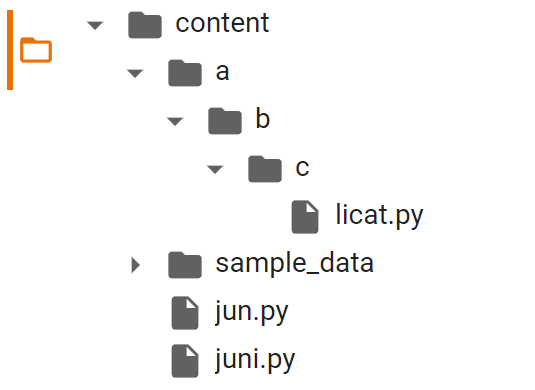

In [ ]:
import a # 폴더가 있기 때문에 애러가 안난겁니다!

print(a)
print(a.b.c) # 이렇게 접근할 수는 없습니다!

In [ ]:
import a.b.c.licat as cat # 현재폴더 나타낼땐 앞에 .

print(cat)
print(cat.name)
print(cat.age)
# print(a.b.c) #이렇게 접근할 수는 없습니다.

In [ ]:
import a.b.c.licat

#print(licat)
print(a.b.c.licat)
print(a.b.c.licat.name)
print(a.b.c.licat.age)

<module 'a.b.c.licat' from '/content/a/b/c/licat.py'>
licat
3


In [ ]:
# 일반적으로 아래처럼 사용
# from은 폴더 import는 모듈
from a.b.c import licat

print(licat)
print(licat.name)
print(licat.age)

<module 'a.b.c.licat' from '/content/a/b/c/licat.py'>
licat
3


## 모듈의 설치와 확인

In [ ]:
!pip list

In [ ]:
!pip install # colab에서도 깔려있지 않은 패키지 설치 하는 방법

# 패키지

* 폴더 안에 .py 파일이 여러개 있다 그럼 그게 패키지

# 연습문제

* 아래와 같은 기능을 하는 모듈을 만들어라<br>
파일 또는 폴더로 만들어야 한다<br>
add(a, b), sub(a, b), mul(a, b), div(a, b)<br>
and(a, b), _or(a, b)

# 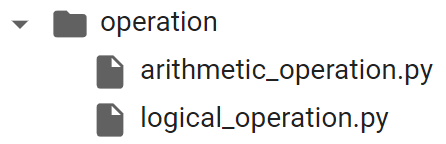

In [ ]:
# 구분해서 저장하는게 중요
# 나중에 유지보수할때 코드 찾기에 유용함

# operation > arithmetic_operation.py
def add(a, b):
    return a + b

def sub(a, b):
    return a - b

def mul(a, b):
    return a * b

def div(a, b):
    return a / b

# operation > logical_operation.py
def _and(a, b):
    return a and b

def _or(a, b):
    return a or b

In [ ]:
from operation import arithmetic_operation as ao, logical_operation as lo

In [ ]:
ao.add(3, 4)

7

In [ ]:
lo._and(True, False)

False

In [ ]:
# 450,000개 이상의 Python 패키지, 45만개의 바퀴
# PyPI(Python Package Index)
# https://pypi.org/search/?q=pandas&o=

In [ ]:
import sys

sys.path.append('/content/a/b/c')

In [ ]:
import licat

licat.name

# 부록 - 많이 사용하는 모듈

In [ ]:
import glob

import glob

glob.glob('/content/*.py')
glob.glob('./*/*.py')
glob.glob('./???.py') # ? 갯수가 파일 이름의 길이
glob.glob('./ju??.py') # 파일이름에 ju가 들어가 있는거 찾게 해준다.
glob.glob('*.py')
# glob.glob('/content/**/*.py')

[]

In [ ]:
import os

os.getcwd() # glob라는 모듈이 폴더, 파일 찾는데 더 좋다.

'/content'

In [ ]:
for curDir, dirs, files in os.walk('/content'):
    for f in files:
        print(os.path.join(curDir, f))

/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/logs/2023.09.15/13.22.10.131489.log
/content/.config/logs/2023.09.15/13.22.09.324179.log
/content/.config/logs/2023.09.15/13.21.32.854551.log
/content/.config/logs/2023.09.15/13.21.41.882195.log
/content/.config/logs/2023.09.15/13.20.39.626976.log
/content/.config/logs/2023.09.15/13.21.06.946322.log
/content/.config/configurations/config_default
/content/operation/logical_operation.py
/content/operation/arithmetic_operation.py
/content/operation/__pycache__/arithmetic_operation.cpython-310.pyc
/content/operation/__pycache__/logical_operation.cpython-310.pyc
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/califor

In [ ]:
for current_directory, dirs, files in os.walk('/content'):
    for f in files:
        print(os.path.join(current_directory, f))

/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/logs/2023.09.15/13.22.10.131489.log
/content/.config/logs/2023.09.15/13.22.09.324179.log
/content/.config/logs/2023.09.15/13.21.32.854551.log
/content/.config/logs/2023.09.15/13.21.41.882195.log
/content/.config/logs/2023.09.15/13.20.39.626976.log
/content/.config/logs/2023.09.15/13.21.06.946322.log
/content/.config/configurations/config_default
/content/operation/logical_operation.py
/content/operation/arithmetic_operation.py
/content/operation/__pycache__/arithmetic_operation.cpython-310.pyc
/content/operation/__pycache__/logical_operation.cpython-310.pyc
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/califor

In [ ]:
# os.mkdir()
# os.rename()
# os.remove()

In [ ]:
import sys
a = [1, 2, 3]
b = a
c = a
# sys.getsizeof()
# sys.path
sys.getrefcount(a)

4

In [ ]:
a = [1, 2, 3, 4]
sys.getrefcount(a)

2

In [ ]:
sys.maxsize # python 3.x에서는 거의 쓸일 없다.

9223372036854775807

In [ ]:
import datetime

s = datetime.datetime(2023, 9, 19)
print(s)

2023-09-19 00:00:00


In [ ]:
import datetime

s = datetime.datetime(2023, 9, 19, 14, 10)
print(s)

2023-09-19 14:10:00


In [ ]:
s.year

2023

In [ ]:
s.month

9

In [ ]:
s.day

19

In [ ]:
s.hour

14

In [ ]:
s.hour

14

In [ ]:
s.minute

10

In [ ]:
s.second

0

In [ ]:
s = datetime.datetime(2023, 9, 18, 14, 10)
s.weekday() # 월요일0, 화요일1, 수요일2 ... 일요일6

0

In [ ]:
today = datetime.date.today()
today

datetime.date(2023, 9, 19)

In [ ]:
graduation_date = datetime.datetime(2023, 12, 29, 18, 00)
today = datetime.date.today()
days = datetime.timedelta(days=100)
today + days

datetime.date(2023, 12, 28)

In [ ]:
type(today), type(graduation_date)

(datetime.date, datetime.datetime)

In [ ]:
today = datetime.datetime.combine(datetime.date.today(), datetime.datetime.min.time())
type(today)

datetime.datetime

In [ ]:
graduation_date - today

datetime.timedelta(days=101, seconds=64800)

In [ ]:
import json # 자료형을 json으로 변환

d = {
    'one': 1,
    'two': 2,
    'three': 3,
}

s = json.dumps(d)
type(s)
s[:3]

'{"o'

In [ ]:
dd = json.loads(s) # json을 불려 들일때
type(dd)

dict

In [ ]:
class Human:
    def __init__(self, x, y):
        self.x = x
        self.y = y

jun = Human(10, 20)
json.dumps(jun)

# TypeError: Object of type Human is not JSON serializable(직렬화가 가능하지 않다!)
# 일반 인스턴스는 직렬화가 가능하지 않습니다!
# 직렬화: "데이터 구조나 오브젝트 상태를 동일하거나 다른 컴퓨터 환경에 저장
# (이를테면 파일이나 메모리 버퍼에서, 또는 네트워크 연결 링크 간 전송)하고,
# 나중에 재구성할 수 있는 포맷으로 변환하는 과정"

TypeError: ignored

In [ ]:
import collections

d = collections.deque([1, 2, 3, 4])
d.rotate(1)
d

# 알고리즘 회전초밥집 문제에서 쓰임

deque([4, 1, 2, 3])

In [ ]:
d.rotate(1)
d

deque([3, 4, 1, 2])

In [ ]:
d.rotate(1)
d

deque([2, 3, 4, 1])

In [ ]:
c = collections.Counter('hello world')
c

Counter({'h': 1, 'e': 1, 'l': 3, 'o': 2, ' ': 1, 'w': 1, 'r': 1, 'd': 1})

In [ ]:
c.most_common()

[('l', 3),
 ('o', 2),
 ('h', 1),
 ('e', 1),
 (' ', 1),
 ('w', 1),
 ('r', 1),
 ('d', 1)]

In [ ]:
# 참조용 코드 실행 X
# 디도스 공격
import requests
from bs4 import BeautifulSoup

# for i in range(접속횟수) 하면 접속횟수만큼 사이트에 접속한다 (디도스공격)

paullab_url = 'http://paullab.co.kr/bookservice/'
response = requests.get(paullab_url)
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser')

bookservices = soup.select('.col-lg-6 > h2')     # col-lg-6 클래스 안의 h2 태그 탐색
for no, book in enumerate(bookservices, 1):
    print(no, book.text)

1 메모혁신 Notion(노션) 활용 가이드
2 제주코딩베이스캠프 Code Festival: Python 100제 1부
3 튜토리얼로 배우는 HTML&CSS
4 코딩도장 튜토리얼로 배우는 Python 1편 object
5 코딩도장 튜토리얼로 배우는 python 2편 제어문
6 코딩도장 튜토리얼로 배우는 Python 문제풀이
7 타노스의 건틀릿 알고리즘 With Python
8 xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍
9 러플 튜토리얼로 배우는 Python
10 인공지능을 활용한 업무자동화 With Google Developers Group JEJU
11 2017 제주 코딩 해커톤 Django 트랙 상편 1권


# 예외 처리와 오류 관리

## 에러

In [ ]:
# Syntax Error
for i in range(10)
    print(i)

SyntaxError: ignored

In [ ]:
# SyntaxError
# for i in range(10)
#     print(i)
if False:
    raise SyntaxError
if True:
    raise SyntaxError('hello world') #여러분의 의도에 맞게 적절한 애러를 주실 필요가 있습니다.

SyntaxError: ignored

In [ ]:
# Name Error
print(x)

NameError: ignored

In [ ]:
# Type Error
x = 10
y = '20'
print(x + y)

TypeError: ignored

In [ ]:
# Index Error
my_list = [1, 2, 3]
print(my_list[3]) #슬라이싱은 에러를 내지 않는다 (많이 사용된다)

IndexError: ignored

In [ ]:
# python에서는 안됩니다.
my_list = [1, 2, 3]
my_list.__len__= 100

TypeError: ignored

In [ ]:
# Key Error
my_dict = {'a': 1, 'b': 2}
print(my_dict['c'])

KeyError: ignored

In [ ]:
# Value Error
int('a')

ValueError: ignored

In [ ]:
# ZeroDivision Error
x = 10
y = 0
print(x / y)

ZeroDivisionError: ignored

In [ ]:
def f():
    return True

def ff():
    return 1/0

f() or ff()

True

In [ ]:
# Attribute Error
my_list = [1, 2, 3]
print(my_list.appeend(4))

AttributeError: ignored

In [ ]:
# Type Error
def add(x, y):
    return x + y

add(1, 2, 3) # *args, **kargs 를 추가 해야 한다.

TypeError: ignored

In [ ]:

def add(x, y, *args):
    print(x, y, args)
    return x + y

add(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

1 2 (3, 4, 5, 6, 7, 8, 9, 10)


3

In [ ]:
# File I/O Error
f = open('non-existent.txt', 'r')
f.read()

FileNotFoundError: ignored

## 예외 처리

In [ ]:
# 오류가 난 곳을 찾아 유지보수하기가 어렵다.
# 매우 중요!!
# 서비스 종료가 될수 있는 대참사가 날수 있다.
try:
    # 1000줄
except:
    # 100줄

In [ ]:
try:
    할인율 = 0
    치킨값 = 30000 / 할인율
    print('치킨주문 완료')
except:
    print('결제가 안되었습니다.')

결제가 안되었습니다.


In [ ]:
try:
    할인율 = 0
    치킨값 = 30000 / 할인율
    print('치킨주문 완료')
print('hello')

SyntaxError: ignored

In [ ]:
try:
    할인율 = 0
    # 치킨값 = 30000 / 할인율
    print('치킨주문 완료')
except:
    print('결제가 안되었습니다.')
else: # 에러 없이 실행되면 else를 실행합니다. while, for + else 조합과 비슷하다.
    print('else')

치킨주문 완료
else


In [ ]:
try:
    할인율 = 0
    # 치킨값 = 30000 / 할인율
    print('치킨주문 완료')
except:
    print('결제가 안되었습니다.')
finally:
    print('무조건 실행')


치킨주문 완료
무조건 실행


In [ ]:
# 간단하게 error를 만들고 테스트하기에 좋다
test = 'hello'

assert test == 'hello', '애러 메시지 1' #1
assert test == 'world', '애러 메시지 2' #2
assert test + 3 == 5, '애러 메시지 3' #3

AssertionError: ignored

In [ ]:
x = 10
# raise
# raise ValueError
# raise ValueError('코드를 잘~~ 만들어주세요.')
y = 20

In [ ]:
try:
    1/0
except ValueError:
    print('ValueError')
except ZeroDivisionError:
    print('ZeroDivisionError')

print(ZeroDivisionError)
print(type(ZeroDivisionError))
print(dir(ZeroDivisionError))

In [ ]:
class Leehojun(Exception): #Exception을 상속받으면 됩니다.
    def __init__(self):
        super().__init__('입력된 값이 leehojun이 아닙니다.')

raise Leehojun

Leehojun: ignored

In [ ]:
import logging

logging.basicConfig(level=logging.INFO) # 어느 레벨부터 로깅할지, 기본으로 warning 부터 합니다.

logging.debug("This is a debug message") # 고쳐야 할 코드, 기록 필요
logging.info("This is an info message") # 정보성 메시지
logging.warning("This is a warning message") # 경고 메시지
logging.error("This is an error message") # 애러 메시지(프로그램은 동작)
logging.critical("This is a critical message") # 프로그램 중지(애러처리 안된경우)

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


## 오류 관리

In [ ]:
import logging.handlers

def logger():
    log_obj = logging.getLogger("log_name") # log name으로 log 객체 생성
    log_obj.setLevel(logging.ERROR) # 어디부터 기록할지 설정

    fileHandeler = logging.FileHandler(filename="./test.txt") # 파일로 기록
    # streamHandler = logging.StreamHandler() # 콘솔에 출력

    fileHandeler.setLevel(logging.ERROR) # 파일 기록 레벨 설정
    # streamHandler.setLevel(logging.DEBUG) # 콘솔 기록 레벨 설정

    formatter = logging.Formatter("%(name)s, %(asctime)s, %(levelname)s, %(message)s") #포멧 생성

    fileHandeler.setFormatter(formatter) # 파일 메시지 포멧 설정
    # streamHandler.setFormatter(formatter) # 콘솔 메시지 포멧 설정

    log_obj.addHandler(fileHandeler) # log_obj handler에 파일 출력 방식 추가
    # log_obj.addHandler(streamHandler) # log_obj handler에 파일 콘솔 방식 추가

    return log_obj

log = logger()

# 아래 코드를 기록하고 싶은 곳에 함께 설정
log.debug('debug')
log.info('info')
log.warning('warning')
log.error('error')
log.critical('critical')

print('---')

# 아래와 같이 사용합니다.
def f():
    try:
        x = 1 / 0
    except Exception as e:
        print(e)
        log.error(f'{e} error')

f()

ERROR:log_name:error
CRITICAL:log_name:critical
ERROR:log_name:division by zero error


---
division by zero


# 과제

---
## 문제1(라운지 쓰레드)
* div(a, b)라고 입력했을때 b에 0이 입력되면 예외처리를 하여 정상작동이 되게 만들어라
---

In [103]:
# 문제 1
def div(a, b):
    try:
        return a / b
    except:
        return'b = 0 except'

div(3, 0)

0.6

In [190]:
# 풀이
def div(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        print('Error')
        return None
    except:
        print('Error')

div(3, 0)

Error


---
## 문제2(class 쓰레드)
* 하나의 숫자에 제곱근을 구하는 함수 sqrt_number(num)이 있었을 때
 자체 예외 NegativeNumberError를 정의하세요. 이 예외는 음수가 입력될 때 발생하도록 합니다.
 사용자로부터 숫자를 입력 받아 그 숫자의 제곱근을 반환하는 함수를 작성하세요.
 입력된 숫자가 음수이면 NegativeNumberError를 발생시키고
 "음수의 제곱근은 계산할 수 없습니다."라는 메시지를 출력하세요.
---

In [197]:
# 문제2
import math

class NegativeNumberError(Exception):
    pass

def sqrt_number(num):
    try:
        if num <= 0:
            print("음수의 제곱근은 계산할 수 없습니다.")
            raise NegativeNumberError
        else:
            return math.sqrt(num)

    except NegativeNumberError as e:
        print(e)

sqrt_number(1)
sqrt_number(-1)

1.0

In [ ]:
# 참조
import math

# 사용자 정의 예외 클래스
class NegativeNumberError(Exception):
    pass

def sqrt_number(num):
    if num < 0:
        raise NegativeNumberError("음수의 제곱근은 계산할 수 없습니다.")
    return math.sqrt(num)

try:
    num = float(input("제곱근을 구할 숫자를 입력하세요: "))
    print(sqrt_number(num))
except NegativeNumberError as e:
    print(e)

In [198]:
# 풀이
class NegativeNumberError(Exception):
    def __init__(self):
        super().__init__('음수의 제곱근은 계산할 수 없습니다.')

def sqrt_number(num):
    if num >= 0:
        return num ** 0.5
    else:
        print('음수의 제곱근은 계산할 수 없습니다.')
        raise NegativeNumberError

sqrt_number(4)
sqrt_number(-4)

음수의 제곱근은 계산할 수 없습니다.


NegativeNumberError: ignored

---
## 문제3(class 쓰레드)
* 사용자로부터 인덱스 값을 입력 받아서 리스트 ["apple", "banana", "cherry"]에서
 해당 인덱스의 값을 출력하는 함수를 작성하세요.
 사용자가 범위를 벗어난 인덱스를 입력하면 "리스트의 범위를 벗어났습니다."라는 메시지를 출력하세요.
---

In [182]:
# 문제3

def fruits_list(num):
    try:
        return fruits[num]
    except IndexError:
        return "리스트의 범위를 벗어났습니다."

fruits = ["apple", "banana", "cherry"]

print(fruits_list(0))
print(fruits_list(1))
print(fruits_list(2))
print(fruits_list(3))

apple
banana
cherry
리스트의 범위를 벗어났습니다.


In [184]:
# 참조1

def get_value_from_list(lst, index):
    try:
        return lst[index]
    except IndexError:
        return "리스트의 범위를 벗어났습니다."

fruits = ["apple", "banana", "cherry"]

print(get_value_from_list(fruits, 1))  # banana
print(get_value_from_list(fruits, 3))  # 리스트의 범위를 벗어났습니다.

banana
리스트의 범위를 벗어났습니다.


In [188]:
# 참조2

def print_fruit():
    fruits = ["apple", "banana", "cherry"]
    try:
        index = int(input("값을 넣어주세요:"))
        print(fruits[index])
    except IndexError:
        print("리스트의 범위를 벗어났습니다.")
    except ValueError:
        print("잘못된 값. 올바른 값을 넣어주세요.")

print_fruit()

값을 넣어주세요:0
apple


In [199]:
# 풀이
def get_item(num):
    item_list = ["apple", "banana", "cherry"]
    try:
        return item_list[num]
    except IndexError:
        return "리스트의 범위를 벗어났습니다."
    except: # 이런 경우를 대비 하는것이 좋다.
        return "예상치 못한 애러입니다."

num = int(input('인덱스 값을 입력해 주세요.: '))
get_item(num)

KeyboardInterrupt: ignored